#Fourier Transform Process
The Fourier Transform takes a complex, time-domain signal and decomposes it into a
sum of simple sine and cosine waves (sinusoids) with different frequencies, amplitudes,
and phases. Mathematically, it transforms the signal from a function of time f(t)to a
function of frequency F(ω)

Why the Transformation Makes the Diagram Clearer
Decomposition into Simple Components: The Fourier Transform breaks down a complex signal into a series of sine and cosine waves. This decomposition makes it easier to analyze and understand the underlying frequency components.
Easier Interpretation: In the frequency domain, you can clearly see which frequencies are present in the signal and their respective amplitudes. This can help identify periodicities, filter out noise, or highlight dominant frequencies.
Signal Processing: Many signal processing tasks (like filtering, modulation, etc.) are easier to perform in the frequency domain. Once processed, the inverse Fourier Transform can convert the signal back to the time domain.


oth Fourier Transform and Wavelet Transform are extensively used in image processing for various applications. Here are some examples and use cases for each:

Fourier Transform in Image Processing


1. **Image Filtering**
Example: Removing periodic noise from an image.
Use Case: If an image contains periodic noise (like grid patterns or repetitive distortions), you can use the Fourier Transform to convert the image to the frequency domain. In the frequency domain, this noise often appears as distinct peaks. By applying a filter to attenuate these peaks and then applying the inverse Fourier Transform, the noise can be significantly reduced.
How it Works: Fourier Transform decomposes the image into its frequency components. Filtering is applied to remove unwanted frequencies, and the inverse Fourier Transform reconstructs the filtered image.

2. Image Compression
Example: JPEG compression.
Use Case: JPEG compression uses the Discrete Cosine Transform (DCT), a type of Fourier Transform, to convert image data into frequency domain. This allows high-frequency components (which often correspond to details) to be selectively compressed or removed, significantly reducing file size while preserving visual quality.
How it Works: The DCT transforms image blocks into frequency components. Quantization reduces the precision of less important frequencies, and entropy coding is applied to compress the data.

3. Image Restoration
Example: De-blurring images.
Use Case: When an image is blurred, you can use the Fourier Transform to analyze the frequency content of the blur and apply a deconvolution filter to restore the original image.
How it Works: Fourier Transform analyzes the blur function (Point Spread Function, PSF). Deconvolution uses this PSF to reverse the blur effect and restore the image.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Time domain signal
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Fourier Transform
freq = np.fft.fftfreq(len(t), d=t[1] - t[0])
spectrum = np.fft.fft(signal)

Text(0.5, 1.0, 'Time Domain Signal')

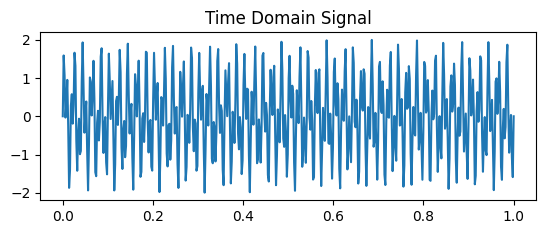

In [7]:
# Plot
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")

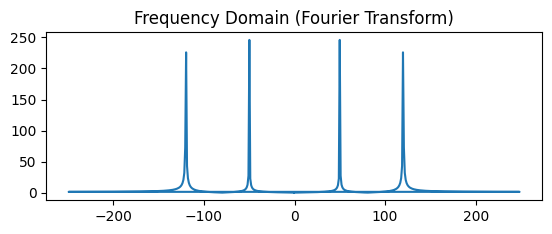

In [9]:
# Plot

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(spectrum))
plt.title("Frequency Domain (Fourier Transform)")
plt.show()

In [10]:
# start examples with opencv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [60]:
img = cv.imread('x.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

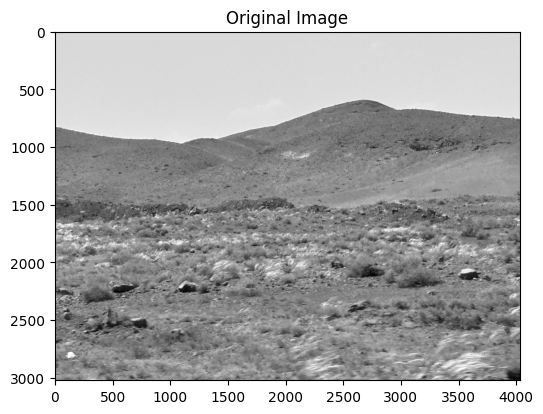

In [25]:
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.show()

In [26]:
# perform the fourier Transform
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [31]:
# what is this
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))



Magnitude Spectrum
Definition: The magnitude spectrum of a signal is a representation of the magnitude of its frequency components. It shows how much of each frequency is present in the signal, without considering the phase.
How It Works:
Fourier Transform: The Fourier Transform converts a time-domain signal into its frequency components. This process results in a complex-valued function that includes both magnitude and phase information.
Magnitude Calculation: The magnitude spectrum is obtained by taking the absolute value (magnitude) of these complex numbers, effectively ignoring the phase information.
Mathematically, if the Fourier Transform of a signal f(t)is
F(ω), the magnitude spectrum is given by
F|(ω)∣.

Image Processing:
Noise Reduction: In image processing, the magnitude spectrum can help identify and filter out specific frequency components, such as periodic noise.

Use Cases
Image Processing:
Noise Reduction: In image processing, the magnitude spectrum can help identify and filter out specific frequency components, such as periodic noise.
Image Compression: Techniques like JPEG compression use frequency domain representations to compress images efficiently.

Signal Processing:
Audio Processing: The magnitude spectrum is used to analyze and modify audio signals. For example, equalizers adjust the magnitude of specific frequency bands to enhance audio quality.

Telecommunications: Frequency analysis is crucial in telecommunications for filtering and signal modulation.
Medical Imaging:
MRI: Magnetic Resonance Imaging (MRI) uses the Fourier Transform to reconstruct images from raw data collected in the frequency domain.

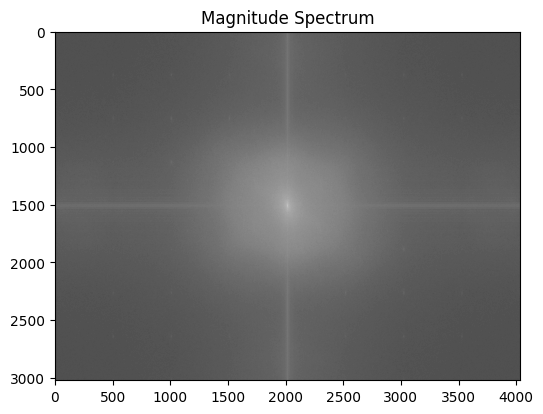

In [30]:
# Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

In [32]:
rows , cols = img.shape
crows , ccols = rows // 2 , cols // 2

In [37]:
mask = np.ones((rows, cols, 2), np.uint8)
r = 15
center = [crows , ccols]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

In [38]:
fshift = dft_shift * mask

In [39]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

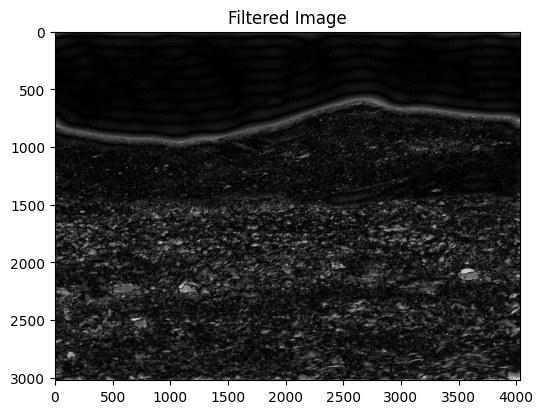

In [40]:
plt.figure(figsize=(6, 6))
plt.title("Filtered Image")
plt.imshow(img_back, cmap='gray')
plt.show()

Wavelet Transform
Definition: Wavelet Transform is a mathematical technique used to decompose a signal into components of various scales (frequencies) by using wavelets. Unlike the Fourier Transform, which uses sine and cosine functions (infinite length), wavelets are localized in both time and frequency, making them more effective for analyzing non-stationary signals.

Wavelet Transform in Image Processing
1. Edge Detection
Example: Detecting edges in medical images.
Use Case: Wavelet Transform can detect edges and fine details in images by analyzing the image at multiple scales. It's particularly useful in medical imaging to enhance features like blood vessels or tumors.
How it Works: Wavelet Transform decomposes the image into different scales, allowing the identification of edges and fine details at various resolutions. The transform highlights discontinuities in intensity, indicating edges.

2. Image Compression
Example: JPEG 2000 compression.
Use Case: JPEG 2000 uses Wavelet Transform for image compression. Wavelet-based compression offers better quality at higher compression ratios compared to traditional JPEG.
How it Works: The image is decomposed into wavelet coefficients, which are then quantized and encoded. The coefficients representing fine details can be more aggressively compressed, achieving high compression rates with minimal quality loss.

3. Image Denoising
Example: Removing noise from astronomical images.
Use Case: Wavelet Transform is effective in denoising images by separating the noise from the image signal. It's widely used in fields like astronomy, where images often contain significant amounts of noise.
How it Works: The image is transformed into the wavelet domain, where noise is typically represented by small coefficients. By thresholding these coefficients, noise can be reduced without affecting the primary image details.

4. Multi-Resolution Analysis
Example: Zooming into images without losing detail.
Use Case: Wavelet Transform allows multi-resolution analysis, where images can be viewed and processed at different levels of detail. This is useful in applications like satellite imaging and medical diagnostics.
How it Works: Wavelet Transform decomposes the image into various levels of detail, allowing the examination and processing at multiple resolutions. This helps in focusing on specific details without losing context.

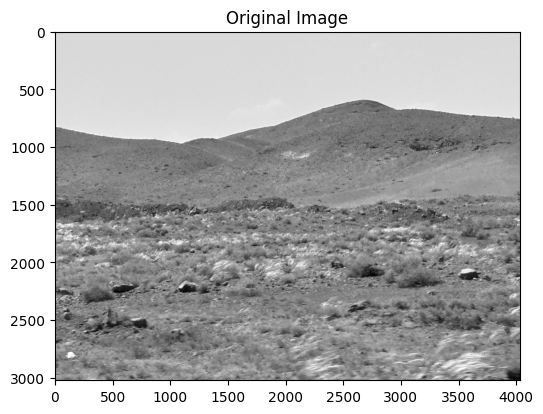

In [41]:
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.show()

In [45]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.7 MB/s eta 0:00:00


In [46]:
import pywt

In [53]:
def apply_wavelet_transform(img):
  coeffs2 = pywt.dwt2(img, 'db1')
  LL , (LH , HL , HH) = coeffs2
  return LL , (LH , HL , HH)

In [57]:
def plot_wavelet_coeffs(LL , LH , HL , HH):
  plt.figure(figsize=(6, 6))

  plt.subplot(2, 2, 1)
  plt.title("Approximation")
  plt.imshow(LL, cmap='gray')

  plt.subplot(2, 2, 2)
  plt.title("Horizontal Detail")
  plt.imshow(LH, cmap='gray')

  plt.subplot(2, 2, 3)
  plt.title("Vertical Detail")
  plt.imshow(HL, cmap='gray')

  plt.subplot(2, 2, 4)
  plt.title("Diagonal Detail")
  plt.imshow(HH, cmap='gray')

  plt.show()

In [58]:
def main():
  LL , (LH , HL , HH) = apply_wavelet_transform(img)
  plot_wavelet_coeffs(LL , LH , HL , HH)

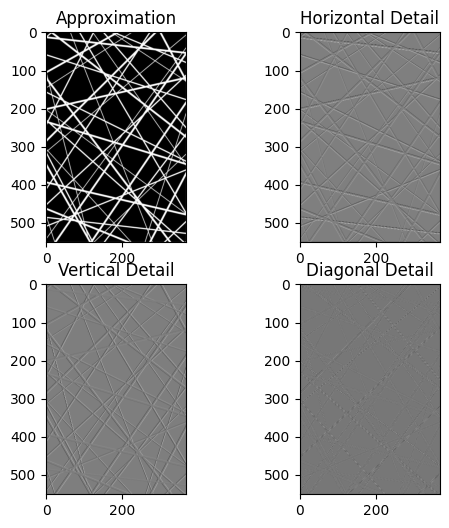

In [61]:
main()